In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df=sns.load_dataset("iris")

In [53]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [54]:
df=df[df['species']!="setosa"]

In [55]:
df["species"].unique()

array(['versicolor', 'virginica'], dtype=object)

In [56]:
df["species"]=df["species"].map({'virginica':0, 'versicolor':1})

In [57]:
##Features into dependent and independent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [58]:
X

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [59]:
y

50     1
51     1
52     1
53     1
54     1
      ..
145    0
146    0
147    0
148    0
149    0
Name: species, Length: 100, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [61]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
105,7.6,3.0,6.6,2.1
138,6.0,3.0,4.8,1.8
76,6.8,2.8,4.8,1.4
92,5.8,2.6,4.0,1.2
119,6.0,2.2,5.0,1.5
...,...,...,...,...
110,6.5,3.2,5.1,2.0
121,5.6,2.8,4.9,2.0
64,5.6,2.9,3.6,1.3
142,5.8,2.7,5.1,1.9


In [62]:
from sklearn.linear_model import LogisticRegression
regression=LogisticRegression()

In [63]:
from sklearn.model_selection import GridSearchCV

parameter={'C':[0.5,1,2,3,5,6,7,9,10,30,45],"penalty":['l1','l2','elasticnet']}
log_regressor=GridSearchCV(regression,parameter,scoring="accuracy",cv=5)

log_regressor.fit(X,y)


C:\Users\saket\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
110 fits failed out of a total of 165.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\saket\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\saket\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\saket\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Va

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 2, 3, 5, 6, 7, 9, 10, 30, 45],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [64]:
print(log_regressor.best_params_)

{'C': 10, 'penalty': 'l2'}


In [65]:
print(log_regressor.best_score_)#accuracy

0.97


In [66]:
prediction_log=log_regressor.predict(X_test)

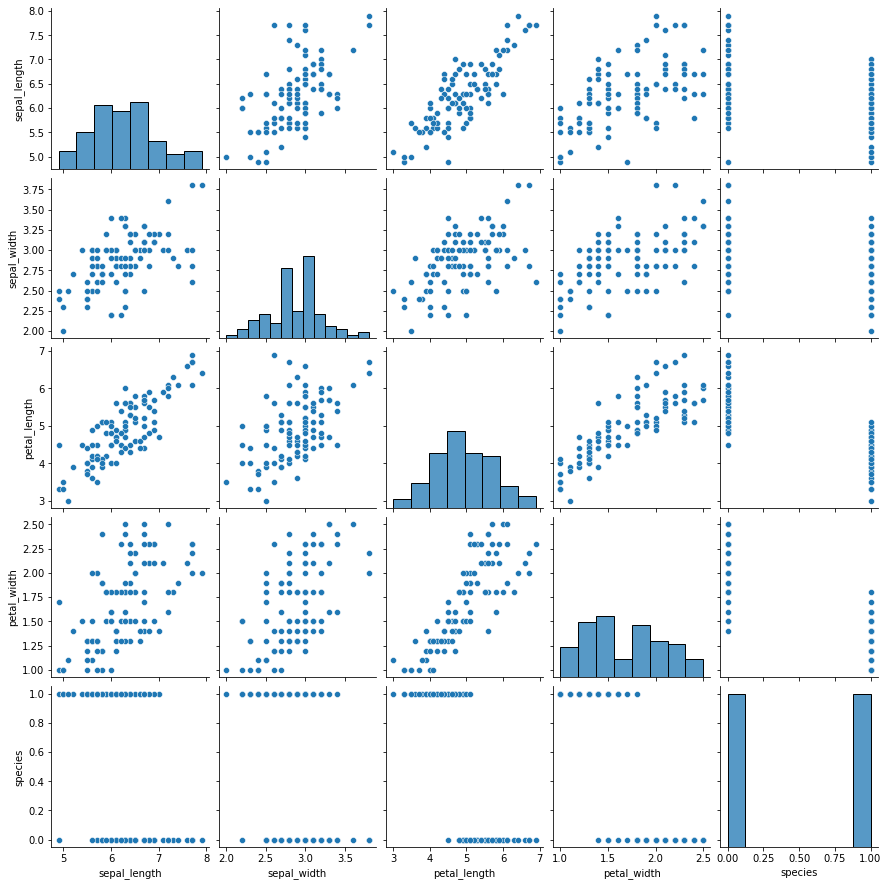

In [67]:
sns.pairplot(df)

In [68]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,roc_auc_score,f1_score


In [69]:
confusion_matrix(y_test,prediction_log)

array([[ 8,  0],
       [ 1, 11]], dtype=int64)

In [70]:
f1_score(y_test,prediction_log)

0.9565217391304348